<IPython.core.display.Javascript object>


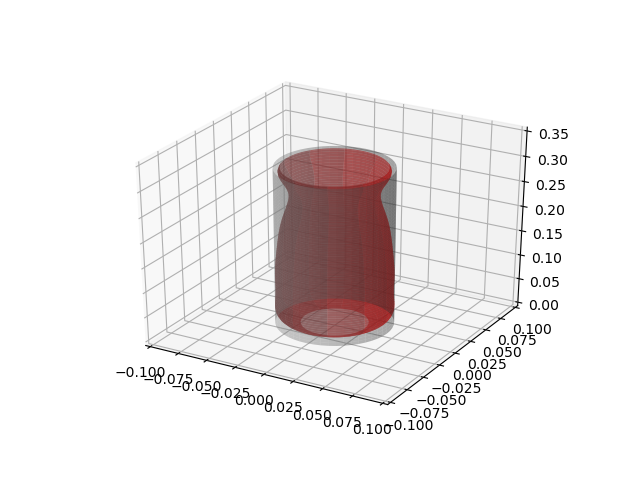

In [1]:
# Importamos as librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mpl_toolkits.mplot3d.axes3d as axes3d
%matplotlib notebook

# Cargamos valores necesitados das coordenadas anteriores
x_max = 0.3142     # x_mCoords máximo
y_max = 0.0454     # y_mCoords máximo
h_tan = 0.098872010494   # Altura da tanxente entre o envase e o xarrón

# Ao calcular o volumen demonos conta de que transformaramos erróneamente o
# ancho do xarrón, este é o polinómio que realmente se axusta á realidade

def f(x):
    return -370976.546711899*x**8 + 468596.922704448*x**7 - 245206.270622495*x**6 + 69037.057198904*x**5 - 11349.2980784123*x**4 + 1102.62904510317*x**3 - 61.0439180756967*x**2 + 1.7349923914579*x + 0.025993040285716
   
def caja_z(centro_x, centro_y, centro_z, rad, altura_z):
    z = np.linspace(centro_z, altura_z, 50)
    angulo = np.linspace(0, 2*np.pi, 50)
    ang_grid, z_grid=np.meshgrid(angulo, z)  
    x_grid, y_grid = rad*np.cos(ang_grid) + centro_x, rad*np.sin(ang_grid) + centro_y 
 
    return x_grid, y_grid, z_grid


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

u, v = np.linspace(0, x_max, 800), np.linspace(0, 2*np.pi, 60)

U, V = np.meshgrid(u, v)

X = U
Y1, Z1 = f(X)*np.cos(V), f(X)*np.sin(V)

ax.plot_surface(Y1, Z1, X, alpha=0.6, color='red', rstride=6, cstride=12)

ax.set_xlim3d(-0.1, 0.1) 
ax.set_ylim3d(-0.1, 0.1)
ax.set_zlim3d(0, 0.35)

Xc,Yc,Zc = caja_z(0, 0, 0, y_max, x_max)
ax.plot_surface(Xc, Yc, Zc, alpha=0.4, color = 'grey')

In [3]:
# Definimos os símnolos a empregar nas integrais
x, y, z, r, Θ = sp.symbols('x y z r Θ', real=True)

# Calculamos o volume exterior coa integral triple en coordenadas cilíndricas, para elo integramos 1*r respeto 
# a r entre 0 e a curva en función de x (altura), a continuación integrase o resultado entre 0 e 2 pi, para
# 'facelo xirar' e por ultimo integramos en 0 e a altura máxima

vol_ext = sp.integrate(1*r, (r,0,f(z)), (Θ,0,2*np.pi), (z, 0, x_max))
print('Volume exterior:\n  {} cm3'.format(vol_ext*10**6))

# Definimos uns grosores posibles aproximados 'a ollo'
grosores = [0.003, 0.004, 0.005]  

# Para cada un dos grosores anteriores facemos a integral anterior, pero restandoó en cada caso a curva en
# función de z, de xeito que a figura teña a mesma forma, pero mais pequena.
print('\nPosibles volumes interiores:')
for h in grosores:
    vol_int = sp.integrate(1*r, (r,0,f(z)-h), (Θ,0,2*np.pi), (z, 0, x_max))
    print('  h = {} m -> {} cm3'.format(h,vol_int*10**6))
    

Volume exterior:
  1691.24393607945 cm3

Posibles volumes interiores:
  h = 0.003 m -> 1456.13243626030 cm3
  h = 0.004 m -> 1381.71029004752 cm3
  h = 0.005 m -> 1309.26232498041 cm3
  h = 0.006 m -> 1238.78852912185 cm3


In [5]:
# No espacio 2D, recta tanxente en h_tan que forma o envase está definida 
# por y = 0.049436005247 (dato sacado das coordenadas das practicas anteriores (y_max))

def g(x):
    return 0.049436005247

## Envase cilíndrico -----------------

# Volume baixo a tanxente, integral da resta da función que xenera o cilindro g(x)
# e a que debuxa o xarrón f(x), no limite(z) de 0 á altura da tanxente (h_tan)

v_baixo = sp.integrate(1*r, (r,0,g(z)-f(z)), (Θ,0,2*np.pi), (z, 0, h_tan))

# Volume sobre a tanxente, integral da resta da función que xenera o cilindro g(x) 
# e a que debuxa o xarrón f(x), no limite(z) da altura da tanxente (h_tan) a o límite do xarrón (x_max)

v_sobre = sp.integrate(1*r, (r,0,g(z)-f(z)), (Θ,0,2*np.pi), (z, h_tan, x_max))

# Mostramos o volume
print('Volume da espuma necesaria (cilindro):\n \
 Por abaixo: {} cm3\n \
 Por enriba: {} cm3\n \
 Total:      {} cm3'.format(v_baixo*10**6, v_sobre*10**6, (v_baixo+v_sobre)*10**6))


## Envase caixa -----------------

# Volume da caixa total, integral de 1 dzdydx entre os limites de altura (0, 0.3142)
# limite de ancho e profundidade 0.0454 correspondente ao radio exterior do xarrón (a maior das coordenadas y_mCoords)
vol_caixa = sp.integrate(1, (z, 0, x_max), (y, -y_max, y_max), (x, -y_max, y_max))

# Para evitar problemas coa integral, primeiro fixemos o volume total da caixa e
# restámolo ao volume exterior do xarrón.

print('\nVolume da espuma necesaria (paralelepipedo):\n \
 Total: {} cm3 '.format((vol_caixa-vol_ext)*10**6))

Volume da espuma necesaria (cilindro):
  Por abaixo: 16.0706610705058 cm3
  Por enriba: 66.8194701683494 cm3
  Total:      82.8901312388552 cm3

Volume da espuma necesaria (paralelepipedo):
  Total: 899.221951920555 cm3 
